In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [3]:
ftxn2_pred_df = pd.read_csv("./dataset/ftxn2_predicted.txt")

In [4]:
ftxn2_pred_df[ftxn2_pred_df["ISFRAUD"] == 'Y']

,TXTYPE,AMOUNT,ACCTTYPEFROM,CATEGORYFROM,same_person_count_x,ACCTTYPETO,CATEGORYTO,same_person_count_y,sum_5days,count_5days,ISFRAUD
0,0,29,3,7,2,0,2,1,29,1,Y
1,0,76,3,7,1,0,8,1,76,1,Y
2,0,71,3,7,1,0,2,1,71,1,Y
3,0,39,3,7,1,0,2,1,39,1,Y
4,0,79,2,7,1,0,8,1,79,1,Y
...,...,...,...,...,...,...,...,...,...,...,...
1532763,0,313,2,7,2,1,26,1,27345,15,Y
1532775,0,226,0,7,2,0,26,1,24117,15,Y
1532896,0,137,3,7,2,0,26,1,14685,15,Y
1532908,0,355,3,7,2,1,26,1,36568,15,Y


In [5]:
print(len(ftxn2_pred_df[ftxn2_pred_df["ISFRAUD"] == 'Y'])/len(ftxn2_pred_df))

0.05000045660134658


In [6]:
sus = ftxn2_pred_df[ftxn2_pred_df["ISFRAUD"] == 'Y']
print(sus["CATEGORYFROM"].value_counts())
print(sus["CATEGORYTO"].value_counts())

7     76602
0        16
27       14
14        6
4         6
43        4
12        4
20        2
Name: CATEGORYFROM, dtype: int64
7     28538
35    14434
26    13829
8     11090
2      8711
0        16
27       14
14        6
4         6
43        4
12        4
20        2
Name: CATEGORYTO, dtype: int64


In [27]:
ty  )
txn_type_fig = txn_type_plot.get_figure()
txn_type_fig.savefig("./plots/suspicious_creditors_category.png" sus["CATEGORYFROM"].value_counts()

0.9993216270514259

[2.60912673e-05 5.21825345e-05 5.21825345e-05 7.82738018e-05
 7.82738018e-05 1.82638871e-04 2.08730138e-04 9.99321627e-01]
['Lawyers' 'Supermarket' 'Finance' 'Wholesale' 'Hotel' 'Trading'
 'Gardening' 'Pottery']
[2.60912673e-05 5.21825345e-05 5.21825345e-05 7.82738018e-05
 7.82738018e-05 1.82638871e-04 2.08730138e-04 1.13640515e-01
 1.44676077e-01 1.80408067e-01 1.88300676e-01 3.72296292e-01]
['Lawyers' 'Distillery' 'Florist' 'Crash Repairs' 'Cafe' 'Supermarket'
 'Finance' 'Wholesale' 'Hotel' 'Trading' 'Gardening' 'Pottery']


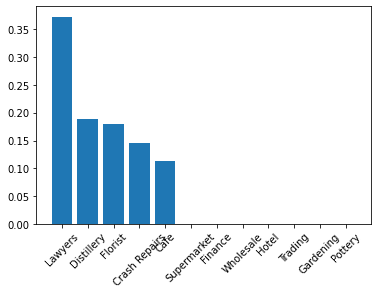

In [47]:
suspicous_txn = ftxn2_pred_df[ftxn2_pred_df["ISFRAUD"] == 'Y']

category_label = ['Supermarket', 'Grocery', 'Cafe', 'Bakery', 'Hotel','Restaurant','Builders','Lawyers','Crash Repairs','Apparel' 'Smallgoods','Property','Cleaning','Gardening','Electrical','Wholesale', 'Events', 'Computers', 'Clinic','Winery', 'Roasters' ,'Pottery', 'Therapeutics', 'Fitness', 'Physiotherapy','Beauty' ,'Podiatry', 'Florist', 'Finance', 'Sports', 'Brewery', 'Used Cars',
 'Garage', 'Pharmacy', 'Butcher', 'Consulting', 'Distillery', 'Cheeses','Management', 'Services', 'Childcare', 'Digital' ,'Accounting', 'Salamis','Trading', 'Music', 'CUSTOMER']


count_list = []
label_list = []

for idx, label in enumerate(category_label):
    try:
        count_list.append(sus["CATEGORYFROM"].value_counts(2)[idx])
        label_list.append(label)
    except:
        continue

count_list = np.array(count_list)
label_list = np.array(label_list)

label_list = label_list[np.argsort(count_list)]
count_list = np.sort(count_list)

print(count_list)
label_list = label_list[::-1]
count_list = count_list[::-1]

print(label_list)
plt.bar(label_list, count_list)
plt.xticks(rotation=45)
plt.savefig("./plots/suspicious_creditors_category.png")

plt.clf()

count_list = []
label_list = []

for idx, label in enumerate(category_label):
    try:
        count_list.append(sus["CATEGORYTO"].value_counts(2)[idx])
        label_list.append(label)
    except:
        continue

count_list = np.array(count_list)
label_list = np.array(label_list)

label_list = label_list[np.argsort(count_list)]
count_list = np.sort(count_list)

print(count_list)
label_list = label_list[::-1]
count_list = count_list[::-1]

print(label_list)
plt.bar(label_list, count_list)
plt.xticks(rotation=45)
plt.savefig("./plots/suspicious_debtors_category.png")